# Imports

In [1]:
# !pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# import tensorflow as tf
# import polars as pl
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
# import xgboost as xgb
# import keras
# import tensorflow as tf
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from time import time
import numpy as np
from sklearn.svm import LinearSVC, SVC
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

# Dataset

In [2]:
data = pd.read_csv("Cleaned_malware.csv", low_memory=False)
data.head()

,Unnamed: 0,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,5,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,53447.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1
1,7,000019515bc8f95851aff6de873405e8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1393.0,0,7.0,0,53447.0,...,63122.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
2,8,00001a027a0ab970c408182df8484fce,win8defender,1.1.15200.1,4.18.1807.18075,1.275.988.0,0,7.0,0,53447.0,...,15510.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
3,15,000027c68b89acb49d4017763b043449,win8defender,1.1.15200.1,4.18.1807.18075,1.275.130.0,0,7.0,0,47238.0,...,19951.0,1,0.0,0.0,0,0,0.0,0.0,1.0,1
4,24,000038f24a1ee98931456b3e49f7934b,win8defender,1.1.15200.1,4.18.1806.18062,1.275.879.0,0,7.0,0,53447.0,...,51032.0,0,0.0,0.0,0,0,0.0,0.0,7.0,0


In [3]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1823550 entries, 0 to 1823549
Data columns (total 78 columns):
 #   Column                                             Dtype  
---  ------                                             -----  
 0   MachineIdentifier                                  object 
 1   ProductName                                        object 
 2   EngineVersion                                      object 
 3   AppVersion                                         object 
 4   AvSigVersion                                       object 
 5   IsBeta                                             int64  
 6   RtpStateBitfield                                   float64
 7   IsSxsPassiveMode                                   int64  
 8   AVProductStatesIdentifier                          float64
 9   AVProductsInstalled                                float64
 10  AVProductsEnabled                                  float64
 11  HasTpm                                            

In [5]:
data.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,...,1.823550e+06,1.823550e+06,1823550.0,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06,1.823550e+06
mean,2.193524e-06,6.847975e+00,1.676017e-02,4.701612e+04,1.383484e+00,1.026553e+00,9.989625e-01,1.069236e+02,8.060299e+04,2.484157e+01,...,3.413802e+04,5.144592e-01,0.0,1.355598e-03,1.460031e-01,3.628362e-02,6.411066e-02,2.223334e-01,8.322673e+00,4.987135e-01
std,1.481054e-03,1.006668e+00,1.283716e-01,1.470503e+04,5.430370e-01,1.835109e-01,3.219411e-02,6.277194e+01,4.913968e+04,5.195289e+00,...,2.095789e+04,4.997910e-01,0.0,3.679349e-02,3.531094e-01,1.869950e-01,2.449500e-01,4.158141e-01,4.477974e+00,4.999985e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00,1.000000e+00,...,8.700000e+01,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,7.000000e+00,0.000000e+00,4.681000e+04,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+01,3.480900e+04,1.800000e+01,...,1.704100e+04,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,0.000000e+00
50%,0.000000e+00,7.000000e+00,0.000000e+00,5.344700e+04,1.000000e+00,1.000000e+00,1.000000e+00,9.400000e+01,8.237300e+04,2.700000e+01,...,3.307000e+04,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00
75%,0.000000e+00,7.000000e+00,0.000000e+00,5.344700e+04,2.000000e+00,1.000000e+00,1.000000e+00,1.600000e+02,1.241500e+05,2.700000e+01,...,5.289700e+04,1.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,1.000000e+00
max,1.000000e+00,8.000000e+00,1.000000e+00,7.049800e+04,6.000000e+00,5.000000e+00,1.000000e+00,2.220000e+02,1.679620e+05,5.200000e+01,...,7.209600e+04,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.500000e+01,1.000000e+00


# Data Cleaning

In [6]:
data.isna()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1823545,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1823546,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1823547,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1823548,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
# data["Census_IsAlwaysOnAlwaysConnectedCapable"].isnull().sum() / len(data)

In [8]:
# data.columns[0]

In [9]:
# for c in data.columns:
#     if ((data[c].isnull().sum() * 100) / len(data)) > 70:
#         data.drop(c, inplace=True, axis = 1)

In [10]:
data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,000016191b897145d069102325cab760,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1094.0,0,7.0,0,53447.0,1.0,...,51039.0,0,0.0,0.0,0,0,0.0,0.0,15.0,1
1,000019515bc8f95851aff6de873405e8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1393.0,0,7.0,0,53447.0,1.0,...,63122.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
2,00001a027a0ab970c408182df8484fce,win8defender,1.1.15200.1,4.18.1807.18075,1.275.988.0,0,7.0,0,53447.0,1.0,...,15510.0,0,0.0,0.0,0,0,0.0,0.0,15.0,0
3,000027c68b89acb49d4017763b043449,win8defender,1.1.15200.1,4.18.1807.18075,1.275.130.0,0,7.0,0,47238.0,2.0,...,19951.0,1,0.0,0.0,0,0,0.0,0.0,1.0,1
4,000038f24a1ee98931456b3e49f7934b,win8defender,1.1.15200.1,4.18.1806.18062,1.275.879.0,0,7.0,0,53447.0,1.0,...,51032.0,0,0.0,0.0,0,0,0.0,0.0,7.0,0


In [11]:
# data.isnull().sum(axis = 1)

In [12]:
# data = data[data.isnull().sum(axis = 1) == 0]
# data.head()

In [13]:
# print(data.shape)
# max(data.isnull().sum())

In [14]:
# data.to_csv("Cleaned_malware.csv")

In [15]:
# data[data['Firewall'] == 1.0]['HasDetections'].value_counts()

# EDA

<Axes: xlabel='ProductName', ylabel='Count'>

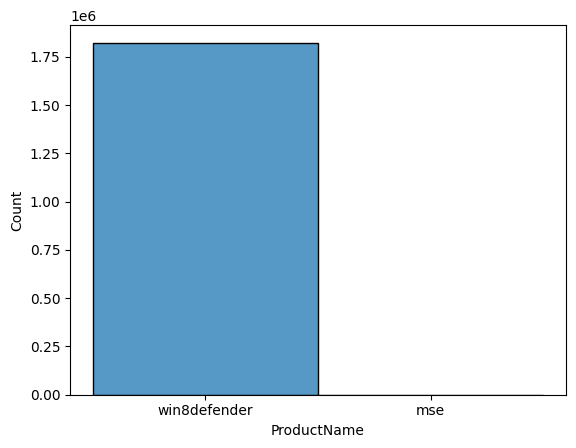

In [16]:
sns.histplot(data['ProductName'])

<Axes: xlabel='HasDetections', ylabel='count'>

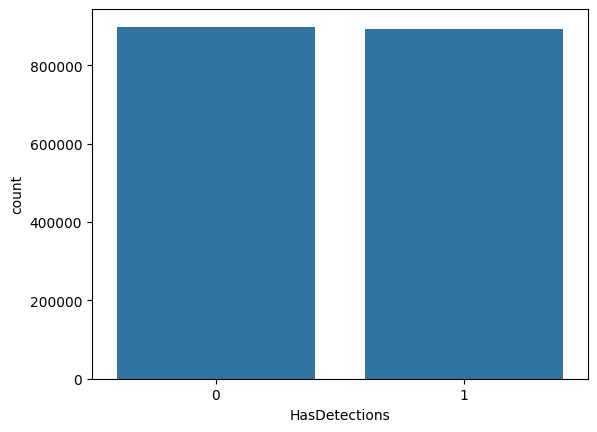

In [17]:
# How many computers had firewall enabled?
sns.countplot(x = data[data['Firewall'] == 1.0]['HasDetections'])

In [18]:
# The version of OS used
(data['Census_OSVersion'].value_counts() > 10000).head()

Census_OSVersion
10.0.17134.228      True
10.0.16299.431      True
10.0.17134.165      True
10.0.10240.17443    True
10.0.16299.371      True
Name: count, dtype: bool

In [19]:
data[data['HasDetections'] == 1]['Census_TotalPhysicalRAM'].value_counts().head(10)

Census_TotalPhysicalRAM
4096.0     455374
8192.0     195502
2048.0     125893
6144.0      51770
16384.0     35704
3072.0      16587
12288.0     15231
1024.0       5010
32768.0      3193
10240.0      1033
Name: count, dtype: int64

<Axes: >

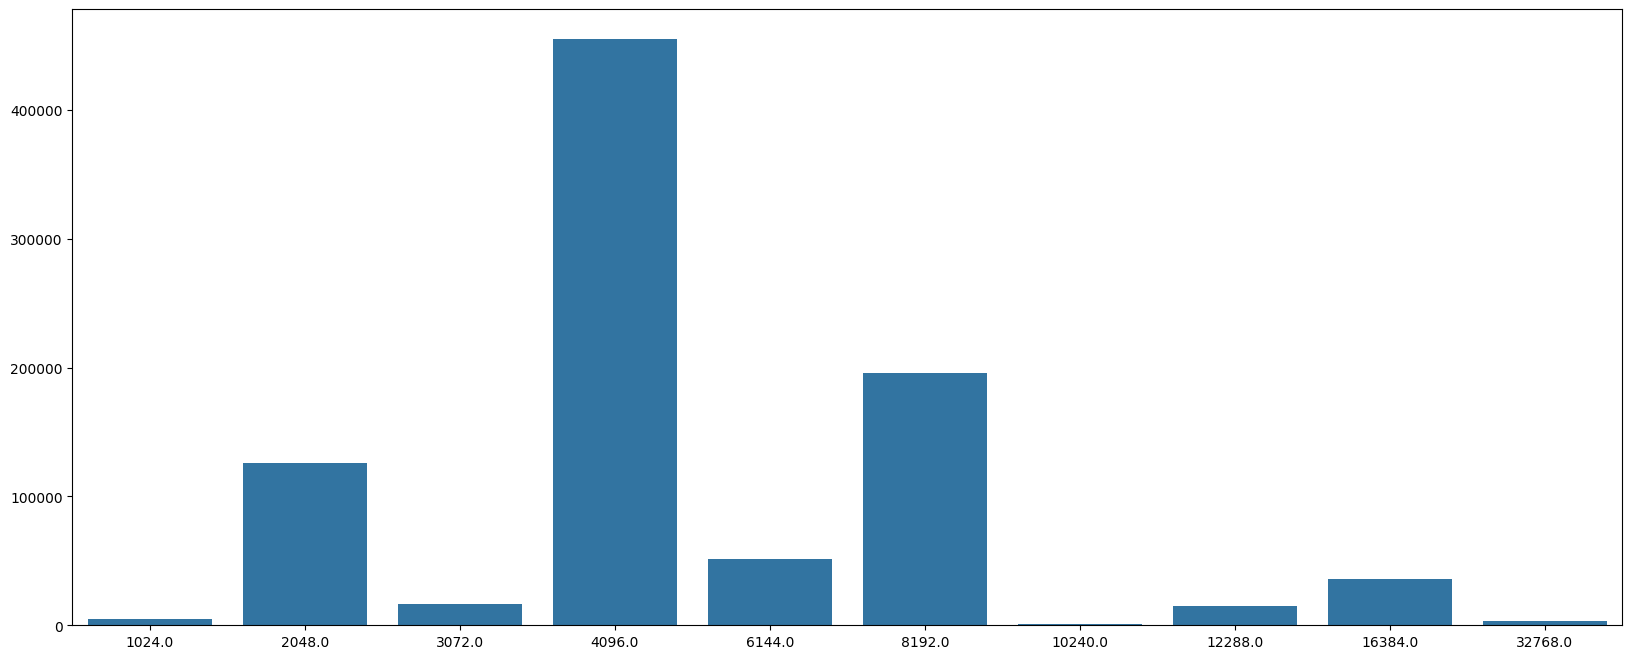

In [20]:
# How much RAM did infected PCs have?
plt.figure(figsize=(20, 8))
plt.tight_layout()
x = dict(data[data['HasDetections'] == 1]['Census_TotalPhysicalRAM'].value_counts().head(10)).keys()
y = dict(data[data['HasDetections'] == 1]['Census_TotalPhysicalRAM'].value_counts().head(10)).values()
sns.barplot(x = list(x), y = list(y))

In [21]:
data[data['HasDetections'] == 1]['HasTpm'].value_counts()

HasTpm
1    908552
0       877
Name: count, dtype: int64

<Axes: >

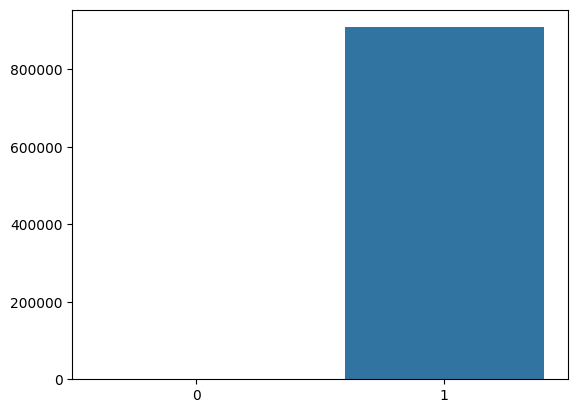

In [22]:
# How many infected PCs had TPM?
plt.tight_layout()
x = dict(data[data['HasDetections'] == 1]['HasTpm'].value_counts()).keys()
y = dict(data[data['HasDetections'] == 1]['HasTpm'].value_counts()).values()
sns.barplot(x = list(x), y = list(y))

In [23]:
data['Wdft_IsGamer'].value_counts()

Wdft_IsGamer
0.0    1418114
1.0     405436
Name: count, dtype: int64

<Axes: >

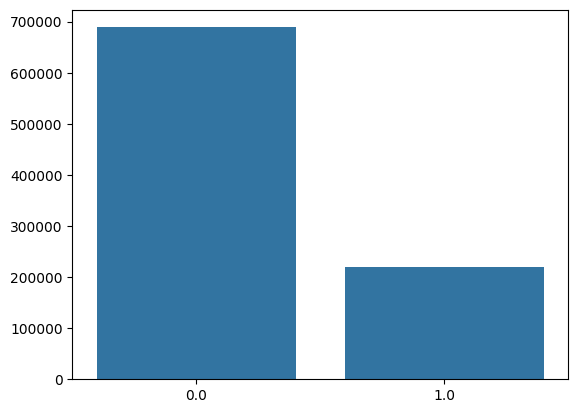

In [24]:
# How many infected PCs had gamer device configuration?
plt.tight_layout()
x = dict(data[data['HasDetections'] == 1]['Wdft_IsGamer'].value_counts()).keys()
y = dict(data[data['HasDetections'] == 1]['Wdft_IsGamer'].value_counts()).values()
sns.barplot(x = list(x), y = list(y))

In [25]:
# How many infected computers had any antivirus protection?
data[data['HasDetections'] == 1]['IsProtected'].value_counts()

IsProtected
1.0    874664
0.0     34765
Name: count, dtype: int64

In [26]:
# Status of Microsoft Smartscreen on the infected computers
data[data['HasDetections'] == 1]['SmartScreen'].value_counts()

SmartScreen
RequireAdmin    647049
ExistsNotSet    226004
Off              17147
Warn             13089
Prompt            4054
Block             1937
&#x02;              64
off                 61
&#x01;              15
On                   4
on                   3
requireadmin         2
Name: count, dtype: int64

# **Data Preprocessing**

### Label Encoding

In [27]:
# data.reset_index(drop = True, inplace = True)
# data.head()

In [28]:
# data['AppVersion'].dtypes == 'object'
data.dtypes.value_counts()

float64    34
object     27
int64      17
Name: count, dtype: int64

In [29]:
len(data['HasDetections'].value_counts())

2

In [30]:
le = LabelEncoder()
numericCols = []
for c in data.columns:
    if data[c].dtypes != 'object' and len(data[c].value_counts()) > 2:
        numericCols.append(c)
    elif data[c].dtypes == 'object':
        data[c] = le.fit_transform(data[c])

print(data.dtypes.value_counts())
print(numericCols)

float64    34
int32      27
int64      17
Name: count, dtype: int64
['RtpStateBitfield', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IeVerIdentifier', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Census_FirmwareVersionIdentifier', 'Wdft_Reg

In [31]:
# for c in data.columns:
#     if data[c].dtypes == 'float64':
#         print(data[c])

### Standard Scaling

In [32]:
# df_copy = data.copy()
# df_copy = df_copy.drop(columns=['HasDetections'])
# scaler = StandardScaler()
# data_scaled = pd.DataFrame(scaler.fit_transform(df_copy), columns=df_copy.columns)
# data_scaled['HasDetections'] = data['HasDetections']

In [33]:
# for c in numericCols:
#     data[c] = scaler.fit_transform(data[c].values.reshape(-1, 1))

In [34]:
# data.head()

### Normalisation

In [35]:
list(data.columns)[:-1]

['MachineIdentifier',
 'ProductName',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductStatesIdentifier',
 'AVProductsInstalled',
 'AVProductsEnabled',
 'HasTpm',
 'CountryIdentifier',
 'CityIdentifier',
 'OrganizationIdentifier',
 'GeoNameIdentifier',
 'LocaleEnglishNameIdentifier',
 'Platform',
 'Processor',
 'OsVer',
 'OsBuild',
 'OsSuite',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'IeVerIdentifier',
 'SmartScreen',
 'Firewall',
 'UacLuaenable',
 'Census_MDC2FormFactor',
 'Census_DeviceFamily',
 'Census_OEMNameIdentifier',
 'Census_OEMModelIdentifier',
 'Census_ProcessorCoreCount',
 'Census_ProcessorManufacturerIdentifier',
 'Census_ProcessorModelIdentifier',
 'Census_PrimaryDiskTotalCapacity',
 'Census_PrimaryDiskTypeName',
 'Census_SystemVolumeTotalCapacity',
 'Census_HasOpticalDiskDrive',
 'Census_TotalPhysicalRAM',
 'Census_ChassisTypeName',
 'Census_Inter

In [36]:
# data_norm = pd.DataFrame(normalize(data.drop("HasDetections", axis = 1)), columns=list(data.columns)[:-1])
# data_norm["HasDetections"] = data["HasDetections"]
# print(data_norm.shape)
# data_norm.head()

In [37]:
# data_norm["HasDetections"].isnull().sum()

# Feature Engineering

In [38]:
# from sklearn.decomposition import PCA
# from sklearn.preprocessing import StandardScaler
# import pandas as pd
# import numpy as np

# # Assuming df is your DataFrame and 'target' is the column you're interested in
# X = data.drop('HasDetections', axis=1)
# y = data['HasDetections']

# # Standardizing the features
# # X = StandardScaler().fit_transform(X)

# # Perform PCA
# pca = PCA(n_components=50)
# principalComponents = pca.fit_transform(X)

# # Create a DataFrame with the principal components
# principalDf = pd.DataFrame(data = principalComponents, columns = ['Principal Component ' + str(i) for i in range(1, 51)])

# # Concatenate the target column
# finalDf = pd.concat([principalDf, data[['HasDetections']]], axis = 1)

# # print(finalDf)HasDetections
# finalDf.head()

In [39]:
# print(len(list(top_features)))

In [40]:
# dataPCA = pd.DataFrame()
# for c in tqdm(list(top_features)):
#     dataPCA[c] = data[c]

# dataPCA['HasDetections'] = data['HasDetections']

In [41]:
# dataPCA.head()

In [42]:
# df = pd.DataFrame()
# l = []
# # data_scaled[data_scaled['HasDetections'] == 1]
# l.append(data_scaled[data_scaled['HasDetections'] == 1].sample(n = 50000))
# l.append(data_scaled[data_scaled['HasDetections'] == 0].sample(n = 50000))
# df = pd.concat(l)
# df.head()
# df.shape

In [43]:
# df = pd.DataFrame()
# l = []
# # data_scaled[data_scaled['HasDetections'] == 1]
# l.append(data_norm[data_norm['HasDetections'] == 1].sample(n = 100000))
# l.append(data_norm[data_norm['HasDetections'] == 0].sample(n = 100000))
# df = pd.concat(l)
# df.head()
# df.shape

In [44]:
df = pd.DataFrame()
l = []
# data_scaled[data_scaled['HasDetections'] == 1]
l.append(data[data['HasDetections'] == 1].sample(n = 50000))
l.append(data[data['HasDetections'] == 0].sample(n = 50000))
df = pd.concat(l)
df.head()
df.shape

(100000, 78)

In [45]:
df['HasDetections'].value_counts()

HasDetections
1    50000
0    50000
Name: count, dtype: int64

In [46]:
# len(df[0])

In [47]:
# Splitting the dataset

In [48]:
x = df.drop("HasDetections", axis = 1)
y = df['HasDetections']
# scaler = StandardScaler()
# x_scaled = scaler.fit_transform(x)
pca = PCA(n_components=10)
x_pca = pca.fit_transform(x)
df_pca = pd.DataFrame(x_pca, columns=[f'PC{i+1}' for i in range(10)])
df_pca['HasDetections'] = y.values
x = df_pca.drop("HasDetections", axis = 1)
y = df_pca['HasDetections']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42, stratify = y)

In [49]:
df_pca.shape

(100000, 11)

# Models

#### 1. Linear SVC

In [50]:
# modelSVC = SVC()
# start = time()
# modelSVC.fit(x_train, y_train)
# end = time()
# print("--------------------------------------------------------")
# print(f"Time taken: {end - start} seconds")
# print("--------------------------------------------------------")
# pred_SVC = modelSVC.predict(x_test)
# acc = accuracy_score(pred_SVC , y_test)
# cm = confusion_matrix(pred_SVC , y_test)
# cr = classification_report(pred_SVC , y_test)
# print(acc)
# print("--------------------------------------------------------")
# print(cm)
# print("--------------------------------------------------------")
# print(cr)
# print("--------------------------------------------------------")

#### 2. LGBM

In [51]:
# modelLGBM = LGBMClassifier()
# start = time()
# modelLGBM.fit(x_train , y_train)
# end = time()
# print("--------------------------------------------------------")
# print(f"Time taken: {end - start} seconds")
# print("--------------------------------------------------------")
# pred_LGBM = modelLGBM.predict(x_test)
# acc = accuracy_score(pred_LGBM , y_test)
# cm = confusion_matrix(pred_LGBM , y_test)
# cr = classification_report(pred_LGBM , y_test)
# print(acc)
# print("--------------------------------------------------------")
# print(cm)
# print("--------------------------------------------------------")
# print(cr)
# print("--------------------------------------------------------")

In [61]:
lgbm = RandomForestClassifier(n_jobs=-1)
param_grid = {
    'n_estimators': [100, 200, 300, 500],  # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30, 40],  # Maximum number of levels in the tree
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, scoring='accuracy', n_jobs=-1, verbose=2, cv = 2)
grid_search.fit(x_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
print(classification_report(y_test, y_pred))

Fitting 2 folds for each of 120 candidates, totalling 240 fits
Best parameters found:  {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.61      0.54      0.57     15000
           1       0.59      0.65      0.62     15000

    accuracy                           0.60     30000
   macro avg       0.60      0.60      0.60     30000
weighted avg       0.60      0.60      0.60     30000



#### 3. Random Forest

In [53]:
model_RF = RandomForestClassifier(n_jobs=-1)
start = time()
model_RF.fit(x_train, y_train)
end = time()
print("--------------------------------------------------------")
print(f"Time taken: {end - start} seconds")
print("--------------------------------------------------------")
pred_RF = model_RF.predict(x_test)
acc = accuracy_score(pred_RF , y_test)
cm = confusion_matrix(pred_RF , y_test)
cr = classification_report(pred_RF , y_test)
print(acc)
print("--------------------------------------------------------")
print(cm)
print("--------------------------------------------------------")
print(cr)
print("--------------------------------------------------------")

--------------------------------------------------------
Time taken: 5.448388576507568 seconds
--------------------------------------------------------
0.5740666666666666
--------------------------------------------------------
[[8768 6546]
 [6232 8454]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.58      0.57      0.58     15314
           1       0.56      0.58      0.57     14686

    accuracy                           0.57     30000
   macro avg       0.57      0.57      0.57     30000
weighted avg       0.57      0.57      0.57     30000

--------------------------------------------------------


In [54]:
cv_scores = cross_val_score(model_RF, x, y, cv=5, scoring='accuracy')
print(cv_scores)

[0.5766  0.57935 0.58525 0.5771  0.57405]


#### 4. ANN

In [55]:
# x_lstm = np.array(x)
# y_lstm = np.array(y)
# x_lstm = x_lstm.reshape((x_lstm.shape[0], x_lstm.shape[1], 1))
# x_train1, x_test1, y_train1, y_test1 = train_test_split(x_lstm, y_lstm, test_size=0.30, random_state=42)
# model = keras.Sequential([
#     keras.layers.LSTM(256, activation='relu', return_sequences=True),
#     keras.layers.LSTM(512, activation='relu'),
# #     keras.layers.Dropout(0.5),
#     keras.layers.Dense(1, activation='sigmoid')
# ])

# model.compile(optimizer=keras.optimizers.Adam(), loss=tf.keras.losses.BinaryCrossentropy(), metrics=[keras.metrics.Accuracy()])

# start = time()
# history = model.fit(x_train1, y_train1, epochs=5, batch_size=32)
# end = time()
# print("--------------------------------------------------------")
# print(f"Time taken: {end - start} seconds")
# print("--------------------------------------------------------")
# pred_ANN = model.predict(x_test)

#### 5. Logistic Regression

In [56]:
model_lr = LogisticRegression(n_jobs = -1, max_iter=1000)
start = time()
model_lr.fit(x_train, y_train)
end = time()
print("--------------------------------------------------------")
print(f"Time taken: {end - start} seconds")
print("--------------------------------------------------------")
pred_lr = model_lr.predict(x_test)
acc = accuracy_score(pred_lr , y_test)
cm = confusion_matrix(pred_lr , y_test)
cr = classification_report(pred_lr , y_test)
print(acc)
print("--------------------------------------------------------")
print(cm)
print("--------------------------------------------------------")
print(cr)
print("--------------------------------------------------------")

--------------------------------------------------------
Time taken: 5.698721170425415 seconds
--------------------------------------------------------
0.572
--------------------------------------------------------
[[7262 5102]
 [7738 9898]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.59      0.53     12364
           1       0.66      0.56      0.61     17636

    accuracy                           0.57     30000
   macro avg       0.57      0.57      0.57     30000
weighted avg       0.59      0.57      0.58     30000

--------------------------------------------------------


#### 6. Decision Trees

In [57]:
model_DT = DecisionTreeClassifier()
start = time()
model_DT.fit(x_train, y_train)
end = time()
print("--------------------------------------------------------")
print(f"Time taken: {end - start} seconds")
print("--------------------------------------------------------")
pred_DT = model_DT.predict(x_test)
acc = accuracy_score(pred_DT , y_test)
cm = confusion_matrix(pred_DT , y_test)
cr = classification_report(pred_DT , y_test)
print(acc)
print("--------------------------------------------------------")
print(cm)
print("--------------------------------------------------------")
print(cr)
print("--------------------------------------------------------")

--------------------------------------------------------
Time taken: 1.7228667736053467 seconds
--------------------------------------------------------
0.5309333333333334
--------------------------------------------------------
[[7849 6921]
 [7151 8079]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.53      0.53     14770
           1       0.54      0.53      0.53     15230

    accuracy                           0.53     30000
   macro avg       0.53      0.53      0.53     30000
weighted avg       0.53      0.53      0.53     30000

--------------------------------------------------------


#### 7. K-Nearest Neighbours

In [58]:
model_KN = KNeighborsClassifier()
start = time()
model_KN.fit(x_train, y_train)
end = time()
print("--------------------------------------------------------")
print(f"Time taken: {end - start} seconds")
print("--------------------------------------------------------")
pred_KN = model_KN.predict(x_test)
acc = accuracy_score(pred_KN , y_test)
cm = confusion_matrix(pred_KN , y_test)
cr = classification_report(pred_KN , y_test)
print(acc)
print("--------------------------------------------------------")
print(cm)
print("--------------------------------------------------------")
print(cr)
print("--------------------------------------------------------")

--------------------------------------------------------
Time taken: 0.1307821273803711 seconds
--------------------------------------------------------
0.5235666666666666
--------------------------------------------------------
[[7426 6719]
 [7574 8281]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     14145
           1       0.55      0.52      0.54     15855

    accuracy                           0.52     30000
   macro avg       0.52      0.52      0.52     30000
weighted avg       0.53      0.52      0.52     30000

--------------------------------------------------------


#### 8. MLP Classifier

In [59]:
model_NN = MLPClassifier()
start = time()
model_NN.fit(x_train, y_train)
end = time()
print("--------------------------------------------------------")
print(f"Time taken: {end - start} seconds")
print("--------------------------------------------------------")
pred_NN = model_NN.predict(x_test)
acc = accuracy_score(pred_NN , y_test)
cm = confusion_matrix(pred_NN , y_test)
cr = classification_report(pred_NN , y_test)
print(acc)
print("--------------------------------------------------------")
print(cm)
print("--------------------------------------------------------")
print(cr)
print("--------------------------------------------------------")

--------------------------------------------------------
Time taken: 11.035987615585327 seconds
--------------------------------------------------------
0.4948666666666667
--------------------------------------------------------
[[ 3010  3164]
 [11990 11836]]
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.20      0.49      0.28      6174
           1       0.79      0.50      0.61     23826

    accuracy                           0.49     30000
   macro avg       0.49      0.49      0.45     30000
weighted avg       0.67      0.49      0.54     30000

--------------------------------------------------------


#### 9. XGBoost

In [60]:
model_XG = xgb.XGBClassifier()
start = time()
model_XG.fit(x_train,y_train)
end = time()
print("--------------------------------------------------------")
print(f"Time taken: {end - start} seconds")
print("--------------------------------------------------------")
pred_XG = model_XG.predict(x_test)
acc = accuracy_score(pred_XG , y_test)
cm = confusion_matrix(pred_XG , y_test)
cr = classification_report(pred_XG , y_test)
print(acc)
print("--------------------------------------------------------")
print(cm)
print("--------------------------------------------------------")
print(cr)
print("--------------------------------------------------------")

NameError: name 'xgb' is not defined

#### 10. AdaBoost

In [ ]:
model_ada = AdaBoostClassifier()
start = time()
model_ada.fit(x_train,y_train)
end = time()
print("--------------------------------------------------------")
print(f"Time taken: {end - start} seconds")
print("--------------------------------------------------------")
pred_ada = model_ada.predict(x_test)
acc = accuracy_score(pred_ada , y_test)
cm = confusion_matrix(pred_ada , y_test)
cr = classification_report(pred_ada , y_test)
print(acc)
print("--------------------------------------------------------")
print(cm)
print("--------------------------------------------------------")
print(cr)
print("--------------------------------------------------------")

#### 12. Gaussian Naive Bayes

In [ ]:
model_gnb = GaussianNB()
start = time()
model_gnb.fit(x_train,y_train)
end = time()
print("--------------------------------------------------------")
print(f"Time taken: {end - start} seconds")
print("--------------------------------------------------------")
pred_gnb = model_gnb.predict(x_test)
acc = accuracy_score(pred_gnb , y_test)
cm = confusion_matrix(pred_gnb , y_test)
cr = classification_report(pred_gnb , y_test)
print(acc)
print("--------------------------------------------------------")
print(cm)
print("--------------------------------------------------------")
print(cr)
print("--------------------------------------------------------")